# **Machine Learning -: K- Means Clustering**
-----
------

### Import required libraries

In [1]:
import pandas as pd
import numpy as np

### Loading the Dataset

In [3]:
df = pd.read_csv("E:\Data Science Notes\8.MACHINE LEARNING\income\income.csv") 

df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df.shape

(22, 3)

In [5]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

In [6]:
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [7]:
df.isna().sum()

Name         0
Age          0
Income($)    0
dtype: int64

### Ploting the Data

In [11]:
import matplotlib.pyplot as plt

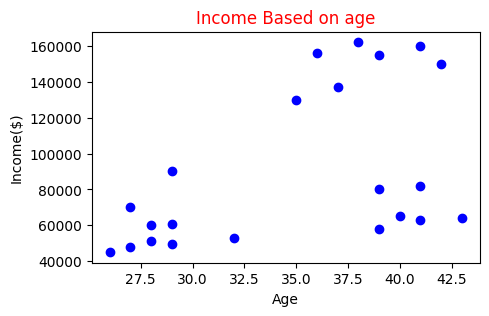

In [15]:
plt.figure(figsize = (5,3))

plt.scatter(df.Age, df['Income($)'] , c = 'b') 

plt.xlabel('Age') 
plt.ylabel('Income($)') 

plt.title("Income Based on age" , c = 'r')
plt.show() 

## Creating clusters

In [17]:
from sklearn.cluster import KMeans 

km = KMeans(n_clusters = 3) 


### Predicting the Clustering

In [21]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']]) 

y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

### Adding **cluster** Cloumn and assign with value

In [23]:
df['cluster'] = y_predicted 

df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


### Filter the cluster

In [28]:
df1 = df[df.cluster == 0] 
df2 = df[df.cluster == 1] 
df3 = df[df.cluster == 2] 

df1

,Name,Age,Income($),cluster
0,Rob,27,70000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0
14,Stark,29,49500,0
15,Ranbir,32,53000,0
16,Dipika,40,65000,0
17,Priyanka,41,63000,0


In [27]:
df2

,Name,Age,Income($),cluster
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1
10,Donald,37,137000,1


In [29]:
df3

,Name,Age,Income($),cluster
1,Michael,29,90000,2
19,Alia,39,80000,2
20,Sid,41,82000,2


## Plotting the clusters
- #### Also giving **centroid**

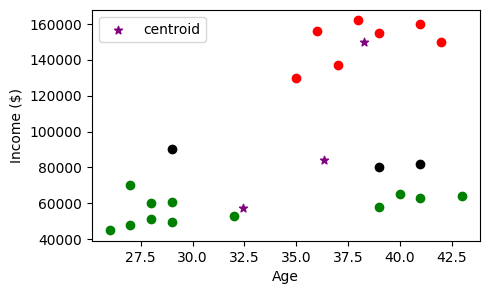

In [37]:
plt.figure(figsize = (5,3))

plt.scatter(df1.Age, df1['Income($)'], color='green') 
plt.scatter(df2.Age, df2['Income($)'], color='red') 
plt.scatter(df3.Age, df3['Income($)'], color='black') 
 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker='*', label='centroid') 
 
plt.xlabel('Age') 
plt.ylabel('Income ($)') 
plt.legend() 
 
plt.show() 

### Apply Feature Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler 

In [33]:
df = pd.read_csv("E:\Data Science Notes\8.MACHINE LEARNING\income\income.csv") 
 
scaler = MinMaxScaler() 
 
scaler.fit(df[['Income($)']]) 
df['Income($)'] = scaler.transform(df[['Income($)']])     # Old value replace with new value
 
scaler.fit(df[['Age']]) 
df['Age'] = scaler.transform(df[['Age']])      # Old value replace with new value
 
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


### Plotting after features scaling 

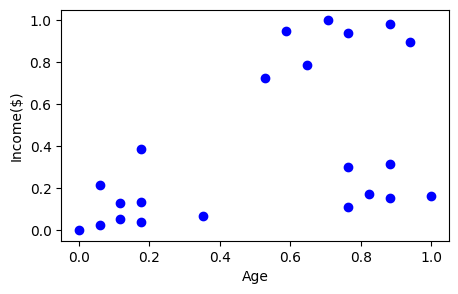

In [38]:
plt.figure(figsize = (5,3))

plt.scatter(df.Age, df[['Income($)']] , c = 'b')

plt.xlabel('Age')
plt.ylabel('Income($)')

plt.show()

### After feature scaling doing **Prediction**

In [43]:
km = KMeans(n_clusters = 3) 

In [64]:
y_pred = km.fit_predict(df[['Age','Income($)']])

y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

### After Prediction Adding **cluster** column

In [68]:
df['cluster'] = y_pred

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


### Find **Cluster distance**

In [66]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

## After Feature Scaling Plotting the clusters 

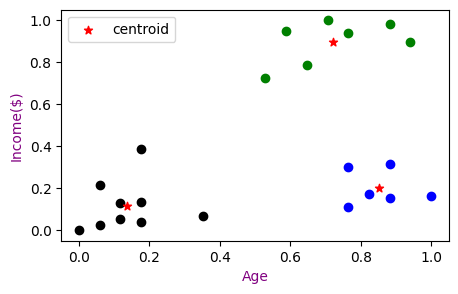

In [78]:
plt.figure(figsize = (5,3))

df1 = df[df.cluster == 0] 
df2 = df[df.cluster == 1] 
df3 = df[df.cluster == 2] 

plt.scatter(df1.Age,df1[['Income($)']], marker = 'o' , color = 'g' )
plt.scatter(df2.Age,df2[['Income($)']], marker = 'o' , color = 'k' )
plt.scatter(df3.Age,df3[['Income($)']], marker = 'o' , color = 'b' )

plt.xlabel('Age' , c= 'purple')
plt.ylabel('Income($)' , c = 'purple')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='r', marker='*',label='centroid') 
 
plt.legend() 
plt.show()

## Apply **Elbow method**

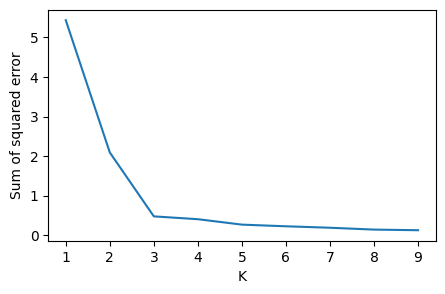

In [81]:
scaler = MinMaxScaler() 
 
scaler.fit(df[['Income($)']]) 
df['Income($)'] = scaler.transform(df[['Income($)']]) 
 
scaler.fit(df[['Age']]) 
df['Age'] = scaler.transform(df[['Age']]) 
 
sse = [] 
k_rng = range(1,10) 
 
for k in k_rng: 
    km = KMeans(n_clusters=k) 
    km.fit(df[['Age', 'Income($)']]) 
    sse.append(km.inertia_) 

plt.figure(figsize = (5,3))

plt.xlabel('K') 
plt.ylabel('Sum of squared error') 
plt.plot(k_rng, sse) 

plt.show()